In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv'
import pandas as pd
df = pd.read_csv(file_path)
df.head()

<ipython-input-41-6de01c41bbd0>:3: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20180806171147,2018-08-07,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,t,t,2,0.32
1,5172,https://www.airbnb.com/rooms/5172,20180806171147,2018-08-07,Quiet Slice of Manhattan,"Quiet, very small one bedroom apartment in Mur...",The bedroom is roomy at 10'x12' and has a quee...,"Quiet, very small one bedroom apartment in Mur...",none,The welcome packet has maps and such. Althoug...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,1,0.67
2,6090,https://www.airbnb.com/rooms/6090,20180806171147,2018-08-06,West Village Nest,"Freshly painted, bright open space! Excellent ...",Excellent West Village Location - Bleecker Str...,"Freshly painted, bright open space! Excellent ...",none,The West Village is the most walking friendly ...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,0.23
3,6848,https://www.airbnb.com/rooms/6848,20180806171147,2018-08-07,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,Our comfortable 500 sq foot (46 sq m) studio a...,Comfortable studio apartment with super comfor...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,0.88
4,8490,https://www.airbnb.com/rooms/8490,20180806171147,2018-08-07,"MAISON DES SIRENES1,bohemian apartment",NaN,I am the lucky owner of an amazing brownstone....,I am the lucky owner of an amazing brownstone....,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,t,t,2,0.60


In [ ]:
# Remove missing neighbourhoods
df = df.dropna(subset=['neighbourhood'])

# Calculate the average price per neighborhood
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
average_price_per_neighborhood = df.groupby("neighbourhood")["price"].mean().reset_index()

print(average_price_per_neighborhood)

# Find the max and min average price and their neighborhoods
max_neighborhood = average_price_per_neighborhood.loc[average_price_per_neighborhood["price"].idxmax(), "neighbourhood"]
min_neighborhood = average_price_per_neighborhood.loc[average_price_per_neighborhood["price"].idxmin(), "neighbourhood"]

print(f"Max average price: {average_price_per_neighborhood['price'].max()} in {max_neighborhood}")
print(f"Min average price: {average_price_per_neighborhood['price'].min()} in {min_neighborhood}")

<ipython-input-42-5bd8e7b4b367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


       neighbourhood       price
0           Allerton   82.466667
1      Alphabet City  167.527778
2           Annadale  106.000000
3           Arrochar  129.000000
4            Astoria  111.437848
..               ...         ...
195     Williamsburg  139.483483
196  Windsor Terrace  124.192593
197        Woodhaven   53.000000
198         Woodlawn   57.500000
199         Woodside   88.740385

[200 rows x 2 columns]
Max average price: 601.6666666666666 in Sea Gate
Min average price: 17.0 in New Dorp Beach


# Calculating Racial Composition of Each Neighborhood by Host

<ipython-input-43-b09bee77d111>:3: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # This is hypothetical


       neighbourhood       price      ASIAN      BLACK       WHITE
0           Allerton   82.466667  75.000000  25.000000    0.000000
1      Alphabet City  167.527778  22.831050  13.470320   63.698630
2           Annadale  106.000000   0.000000   0.000000  100.000000
3           Arrochar  129.000000   0.000000   0.000000  100.000000
4            Astoria  111.437848  17.944251  16.376307   65.679443
..               ...         ...        ...        ...         ...
184     Williamsburg  139.483483  23.123732  12.728195   64.148073
185  Windsor Terrace  124.192593  20.481928  16.867470   62.650602
186        Woodhaven   53.000000  47.058824  17.647059   35.294118
187         Woodlawn   57.500000   0.000000  50.000000   50.000000
188         Woodside   88.740385  40.000000  23.636364   36.363636

[189 rows x 5 columns]
Most Expensive Neighborhood:
      neighbourhood   price  ASIAN  BLACK  WHITE
73  Gerritsen Beach  536.75    0.0  100.0    0.0

Least Expensive Neighborhood:
      neighbou

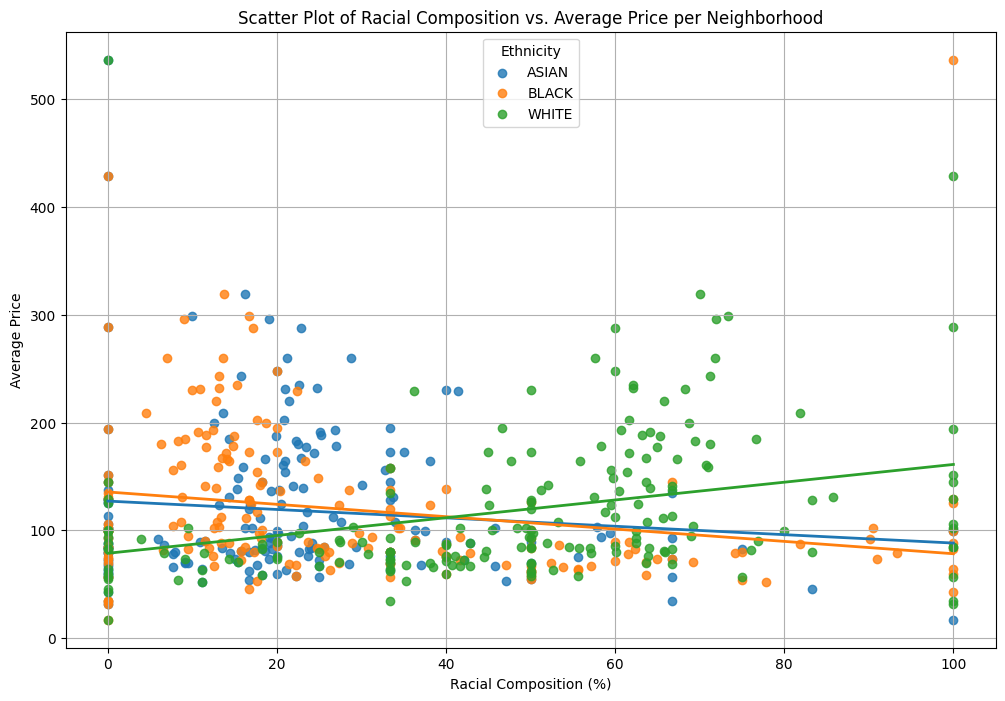

In [ ]:
# Assuming df is your CSV data and neighborhood_df contains listing_id and neighborhood
df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/host.attribute.csv')
neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # This is hypothetical

# Merge the datasets on listing_id
merged_df = pd.merge(df, neighborhood_df, on='listing_id')

# Group by neighborhood and calculate the racial composition
racial_composition = merged_df.groupby('neighbourhood')['ethnicity'].value_counts(normalize=True).unstack(fill_value=0)

# Convert to percentages
racial_composition *= 100

# merging average price with racial composition
merged_df = pd.merge(average_price_per_neighborhood, racial_composition, on='neighbourhood')
print(merged_df)

# Sort neighborhoods by price
sorted_neighborhoods = merged_df.sort_values(by='price', ascending=False)

# Get the most expensive and least expensive neighborhoods
most_expensive = sorted_neighborhoods.head(1)
least_expensive = sorted_neighborhoods.tail(1)

# Print the results for the most expensive and least expensive neighborhoods
print("Most Expensive Neighborhood:")
print(most_expensive)

print("\nLeast Expensive Neighborhood:")
print(least_expensive)

plt.figure(figsize=(12, 8))

for ethnicity in racial_composition.columns:
    sns.regplot(
        data=merged_df,
        x=ethnicity,
        y='price',
        scatter=True,
        label=ethnicity,
        line_kws={'lw': 2},  # Line thickness
        ci=None  # Remove confidence interval for cleaner lines
    )

plt.xlabel("Racial Composition (%)")
plt.ylabel("Average Price")
plt.title("Scatter Plot of Racial Composition vs. Average Price per Neighborhood")
plt.legend(title="Ethnicity")
plt.grid(True)
plt.show()

In [ ]:
# Select the relevant columns for correlation: price and racial composition
columns_of_interest = ['price', 'ASIAN', 'BLACK', 'WHITE']

# Calculate the correlation matrix
correlation_matrix = merged_df[columns_of_interest].corr()

# Display the correlation between price and the racial composition
price_racial_correlation = correlation_matrix['price']

print(price_racial_correlation)

price    1.000000
ASIAN   -0.110327
BLACK   -0.221996
WHITE    0.310864
Name: price, dtype: float64


# Calculating Racial Composition of Each Neighborhood by Guest

<ipython-input-45-f840a1746878>:3: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # This is hypothetical


       neighbourhood       price      ASIAN      BLACK      WHITE
0           Allerton   82.466667  20.334262  34.818942  44.846797
1      Alphabet City  167.527778  22.244726  11.738397  66.016878
2           Annadale  106.000000  25.000000  14.583333  60.416667
3           Arrochar  129.000000   0.000000  50.000000  50.000000
4            Astoria  111.437848  28.825183  14.530635  56.644182
..               ...         ...        ...        ...        ...
193     Williamsburg  139.483483  21.425604  12.417418  66.156978
194  Windsor Terrace  124.192593  19.804666  14.378730  65.816603
195        Woodhaven   53.000000  34.667488  18.719212  46.613300
196         Woodlawn   57.500000  17.948718  28.205128  53.846154
197         Woodside   88.740385  31.589958  16.806137  51.603905

[198 rows x 5 columns]
Most Expensive Neighborhood:
    neighbourhood       price  ASIAN  BLACK  WHITE
156      Sea Gate  601.666667    0.0   50.0   50.0

Least Expensive Neighborhood:
      neighbourhood  p

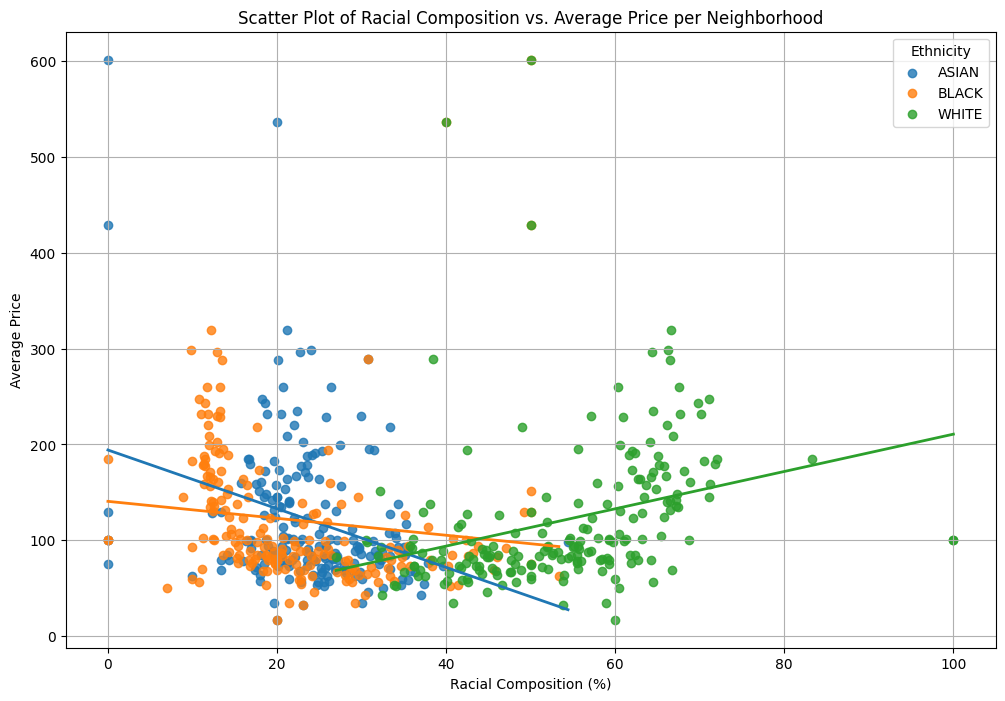

In [ ]:
# Assuming df is your CSV data and neighborhood_df contains listing_id and neighborhood
df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/guest.attribute.csv')
neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # This is hypothetical

# Merge the datasets on listing_id
merged_df = pd.merge(df, neighborhood_df, on='listing_id')

# Group by neighborhood and calculate the racial composition
racial_composition = merged_df.groupby('neighbourhood')['ethnicity'].value_counts(normalize=True).unstack(fill_value=0)

# Convert to percentages
racial_composition *= 100

# merging average price with racial composition
merged_df = pd.merge(average_price_per_neighborhood, racial_composition, on='neighbourhood')
print(merged_df)

# Sort neighborhoods by price
sorted_neighborhoods = merged_df.sort_values(by='price', ascending=False)

# Get the most expensive and least expensive neighborhoods
most_expensive = sorted_neighborhoods.head(1)
least_expensive = sorted_neighborhoods.tail(1)

# Print the results for the most expensive and least expensive neighborhoods
print("Most Expensive Neighborhood:")
print(most_expensive)

print("\nLeast Expensive Neighborhood:")
print(least_expensive)

plt.figure(figsize=(12, 8))

for ethnicity in racial_composition.columns:
    sns.regplot(
        data=merged_df,
        x=ethnicity,
        y='price',
        scatter=True,
        label=ethnicity,
        line_kws={'lw': 2},  # Line thickness
        ci=None  # Remove confidence interval for cleaner lines
    )

plt.xlabel("Racial Composition (%)")
plt.ylabel("Average Price")
plt.title("Scatter Plot of Racial Composition vs. Average Price per Neighborhood")
plt.legend(title="Ethnicity")
plt.grid(True)
plt.show()

In [ ]:
# Select the relevant columns for correlation: price and racial composition
columns_of_interest = ['price', 'ASIAN', 'BLACK', 'WHITE']

# Calculate the correlation matrix
correlation_matrix = merged_df[columns_of_interest].corr()

# Display the correlation between price and the racial composition
price_racial_correlation = correlation_matrix['price']

print(price_racial_correlation)

price    1.000000
ASIAN   -0.297350
BLACK   -0.124578
WHITE    0.300615
Name: price, dtype: float64


<ipython-input-47-87861c6f4483>:7: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # Hypothetical


Correlation Matrix:
 ethnicity             ASIAN     BLACK     WHITE  reviews_per_month
ethnicity                                                         
ASIAN              1.000000 -0.401181 -0.339154           0.003760
BLACK             -0.401181  1.000000 -0.725646           0.091799
WHITE             -0.339154 -0.725646  1.000000          -0.097102
reviews_per_month  0.003760  0.091799 -0.097102           1.000000


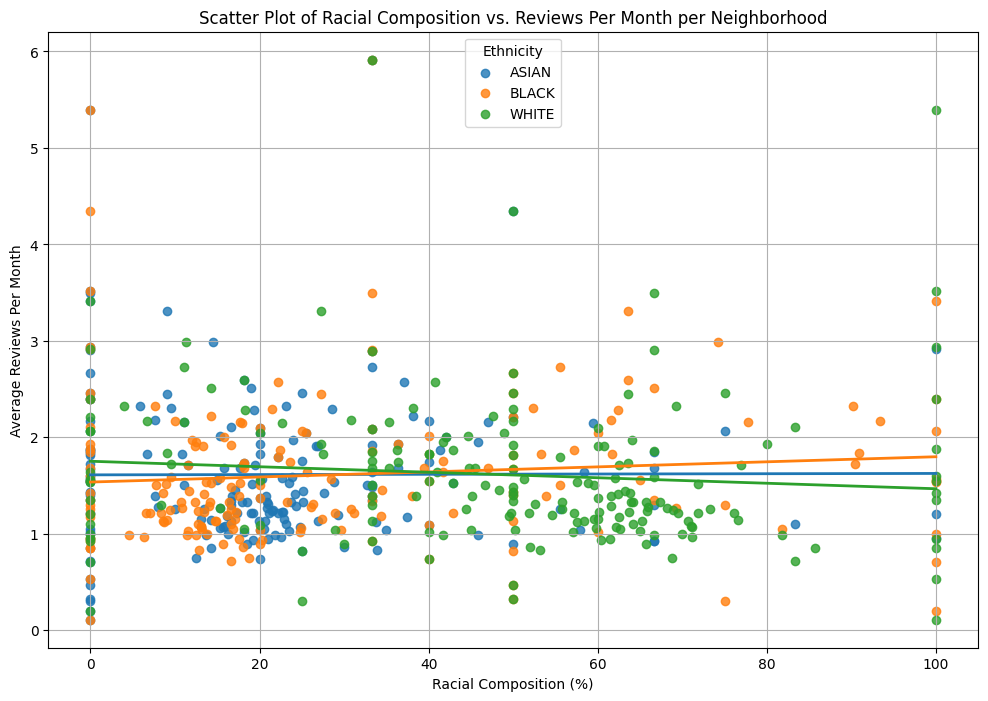

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/host.attribute.csv')
neighborhood_df = pd.read_csv('/content/drive/MyDrive/Airbnb Data/ls.with.rws.csv')  # Hypothetical

# Merge datasets on listing_id
merged_df = pd.merge(df, neighborhood_df, on='listing_id')

# Group by neighborhood and calculate racial composition
racial_composition = merged_df.groupby('neighbourhood')['ethnicity'].value_counts(normalize=True).unstack(fill_value=0)

# Convert to percentages
racial_composition *= 100

# Compute average reviews per month for each ethnicity
avg_reviews_per_ethnicity = merged_df.groupby('ethnicity')['reviews_per_month'].mean()

# Merge racial composition with reviews per month
merged_reviews_df = racial_composition.copy()
merged_reviews_df['reviews_per_month'] = merged_df.groupby('neighbourhood')['reviews_per_month'].mean()

# Compute correlation
correlation_matrix = merged_reviews_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Scatter plot of racial composition vs. reviews per month
plt.figure(figsize=(12, 8))
for ethnicity in racial_composition.columns:
    sns.regplot(
        data=merged_reviews_df,
        x=ethnicity,
        y='reviews_per_month',
        scatter=True,
        label=ethnicity,
        line_kws={'lw': 2},  # Line thickness
        ci=None  # Remove confidence interval
    )

plt.xlabel("Racial Composition (%)")
plt.ylabel("Average Reviews Per Month")
plt.title("Scatter Plot of Racial Composition vs. Reviews Per Month per Neighborhood")
plt.legend(title="Ethnicity")
plt.grid(True)
plt.show()


# Part 2

In [50]:

filepath = '/content/drive/MyDrive/Airbnb Data/Copy of Fully_Standardized_Dataset.csv'
# Load the uploaded CSV (replace the filename if different)
df = pd.read_csv(filepath)  # Replace with actual filename
df.head()  # View the first few rows


,host_id,host_url,hand_guess_gender,hand_guess_race_all,hang_guess_race_wba,name,genderized_guess,dataset_gender,dataset_race
0,1002840.0,https://www.airbnb.com/users/show/1002840,Male,White,White,Vladimir,Male,Male,WHITE
1,26865187.0,https://www.airbnb.com/users/show/26865187,Male,Latino,White,Camilo,Male,Male,ASIAN
2,26877931.0,https://www.airbnb.com/users/show/26877931,Female,South Asian,Asian,Nikki,Female,Female,WHITE
3,26924376.0,https://www.airbnb.com/users/show/26924376,Female,Latino,White,Nikki,Female,Female,BLACK
4,24486514.0,https://www.airbnb.com/users/show/24486514,Female,White,White,Salome,Female,Female,WHITE


In [51]:
def normalize_gender(gender):
    if isinstance(gender, str):
        gender = gender.strip().lower()
        if gender in ['m', 'male']:
            return 'male'
        elif gender in ['f', 'female']:
            return 'female'
    return 'N'  # For unknown, non-binary, or unrecognized values

# Apply normalization
df['hand_guess_gender'] = df['hand_guess_gender'].apply(normalize_gender)
df['genderized_guess'] = df['genderized_guess'].apply(normalize_gender)

In [52]:
# Lowercase all string entries in the DataFrame
f = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-52-c62936039cb0>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  f = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


<Axes: xlabel='genderized_guess', ylabel='dataset_gender'>

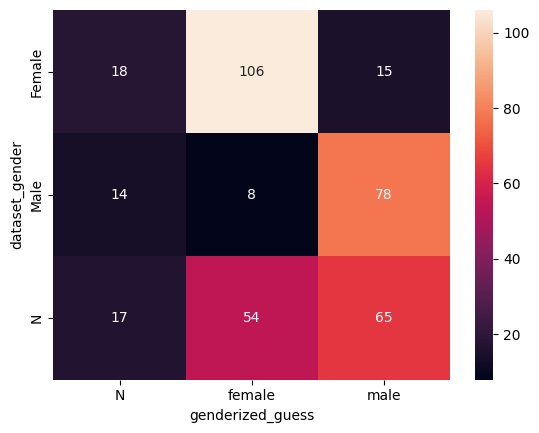

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.crosstab(df['dataset_gender'], df['genderized_guess']), annot=True, fmt='d')

In [54]:
# Show rows where genderized guess is 'N'
df[df['genderized_guess'] == 'N']

,host_id,host_url,hand_guess_gender,hand_guess_race_all,hang_guess_race_wba,name,genderized_guess,dataset_gender,dataset_race
47,3702850.0,https://www.airbnb.com/users/show/3702850,female,White,White,Teniile,N,Female,WHITE
77,16482147.0,https://www.airbnb.com/users/show/16482147,female,Black,Black,Margenett,N,Female,BLACK
126,2533934.0,https://www.airbnb.com/users/show/2533934,male,white,white,Leeore,N,Male,BLACK
130,16648554.0,https://www.airbnb.com/users/show/16648554,female,asian,asian,Irva Guadalupe,N,Female,ASIAN
138,2862308.0,https://www.airbnb.com/users/show/2862308,female,white,white,Auran,N,Female,BLACK
139,1335060.0,https://www.airbnb.com/users/show/1335060,male,white,white,Dim,N,Male,WHITE
146,11050098.0,https://www.airbnb.com/users/show/11050098,female,asian,asian,Xiao,N,Female,WHITE
152,28422099.0,https://www.airbnb.com/users/show/28422099,male,black,black,D,N,Male,BLACK
156,21940966.0,https://www.airbnb.com/users/show/21940966,female,black,black,Mekkie,N,Female,BLACK
161,6003040.0,https://www.airbnb.com/users/show/6003040,male,white,white,Lalo,N,Male,ASIAN


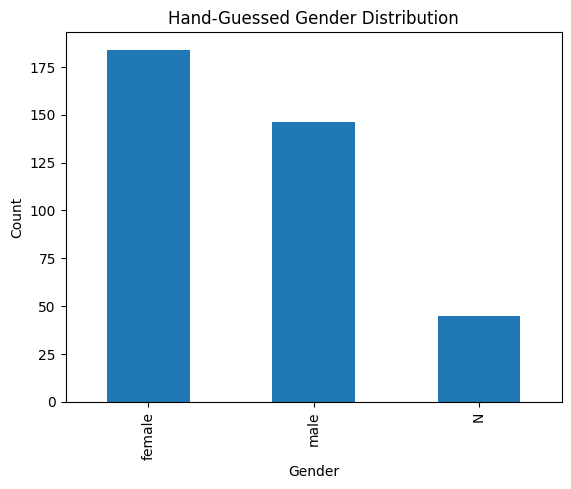

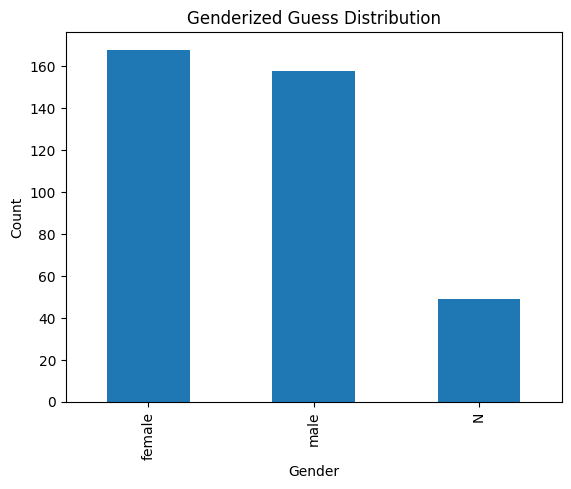

In [55]:
import matplotlib.pyplot as plt

# Hand-guess gender distribution
df['hand_guess_gender'].value_counts().plot(kind='bar', title='Hand-Guessed Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Genderized guess distribution
df['genderized_guess'].value_counts().plot(kind='bar', title='Genderized Guess Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


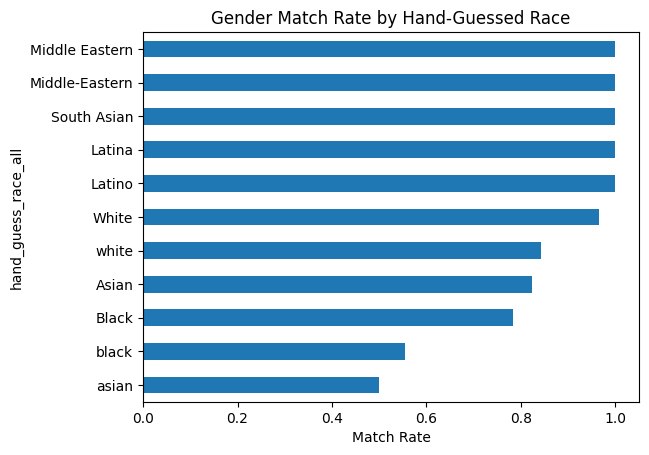

In [56]:
# Create a match column
df['gender_match'] = df['hand_guess_gender'] == df['genderized_guess']

# Group by race and calculate match rates
match_by_race = df.groupby('hand_guess_race_all')['gender_match'].mean().sort_values()

match_by_race.plot(kind='barh', title='Gender Match Rate by Hand-Guessed Race')
plt.xlabel('Match Rate')
plt.show()


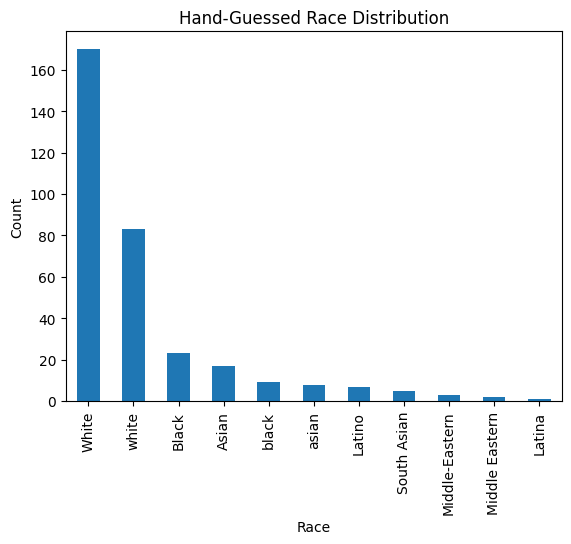

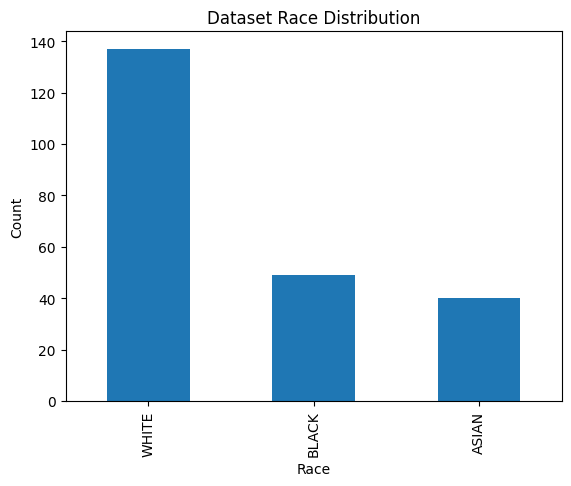

In [57]:
df['hand_guess_race_all'].value_counts().plot(kind='bar', title='Hand-Guessed Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

df['dataset_race'].value_counts().plot(kind='bar', title='Dataset Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


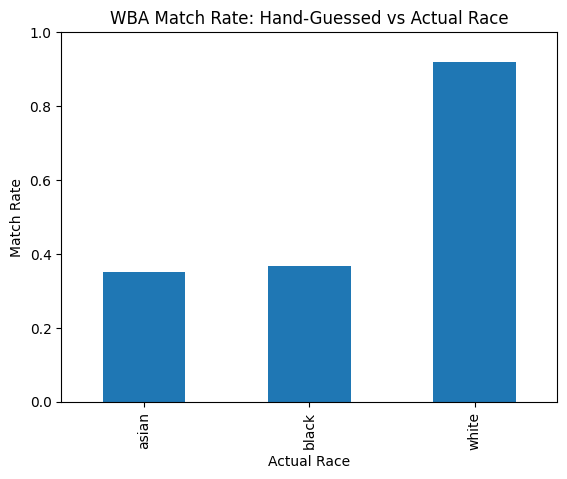

In [58]:
import pandas as pd

# Make sure values are all lowercase for consistency
df['hang_guess_race_wba'] = df['hang_guess_race_wba'].str.lower()
df['dataset_race'] = df['dataset_race'].str.lower()

# Create a column for match
df['race_match_wba'] = df['hang_guess_race_wba'] == df['dataset_race']

# Filter for W/B/A only
wba_df = df[df['dataset_race'].isin(['white', 'black', 'asian'])]

# Group by actual race and calculate match rate
match_rates = wba_df.groupby('dataset_race')['race_match_wba'].mean().sort_values()

# Plot results
match_rates.plot(kind='bar', title='WBA Match Rate: Hand-Guessed vs Actual Race')
plt.ylabel('Match Rate')
plt.xlabel('Actual Race')
plt.ylim(0, 1)
plt.show()


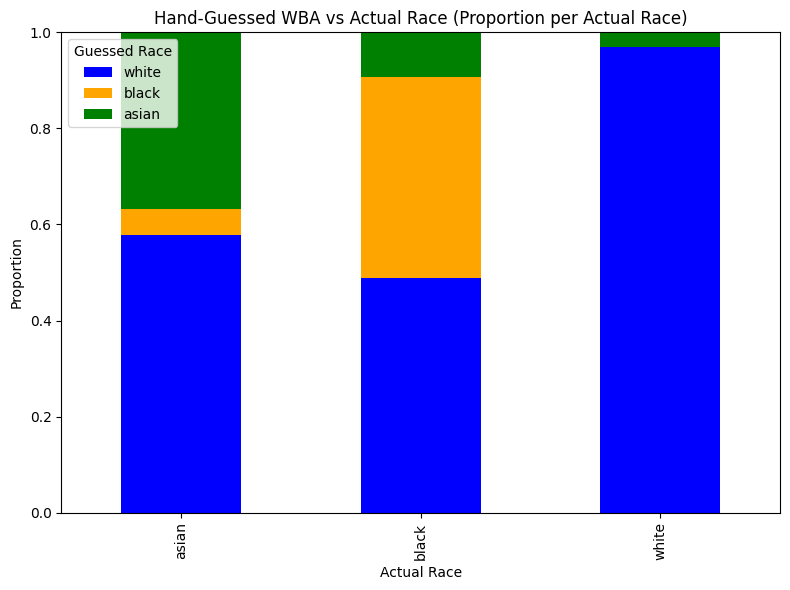

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure lowercase for consistency
df['hang_guess_race_wba'] = df['hang_guess_race_wba'].str.lower()
df['dataset_race'] = df['dataset_race'].str.lower()

# Filter to W/B/A only
df = df[
    df['dataset_race'].isin(['white', 'black', 'asian']) &
    df['hang_guess_race_wba'].isin(['white', 'black', 'asian'])
]

# Create a pivot table
pivot = pd.crosstab(df['dataset_race'], df['hang_guess_race_wba'], normalize='index')
pivot = pivot[['white', 'black', 'asian']]  # consistent order

# Assign color: correct guess = blue, others = distinct
color_map = {
    'white': 'blue',
    'black': 'orange',
    'asian': 'green'
}
# Use column names (guessed race) to map colors
colors = [color_map[col] for col in pivot.columns]

# Plot
ax = pivot.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))
plt.title('Hand-Guessed WBA vs Actual Race (Proportion per Actual Race)')
plt.xlabel('Actual Race')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.legend(title='Guessed Race')
plt.tight_layout()
plt.show()
